### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.

application_2_df = application_df.drop(columns=["EIN", "NAME"])
application_2_df

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0                      N      5000   
1      Co-operative       1         1-9999                      N    108590   
2       Association       1              0                      N      5000   
3             Trust       1    10000-24999                      N      6692   
4             Trust       1  100000-499999                      N    142590   
...             ...     ...            ...                    ...       ...   
34294   Association       1              0                      N      5000   
34295   Association       1              0                      N      5000   
34296   Association       1              0                      N      5000   
34297   Association       1              0                      N      5000   
34298  Co-operative       1          1M-5M                      N  36500179   

       IS_SUCCESSFUL  
0                  1  
1                  1  
2                  0  
3                  1  
4                  1  
...              ...  
34294              0  
34295              0  
34296              0  
34297              1  
34298              0  

[34299 rows x 10 columns]

In [3]:
# Determine the number of unique values in each column.
application_2_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binningl
application_2_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

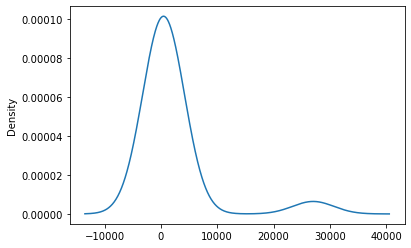

In [5]:
# Visualize the value counts of APPLICATION_TYPE
APPLICATION_TYPE = application_2_df.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE
APPLICATION_TYPE.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(APPLICATION_TYPE[APPLICATION_TYPE < 500].index)

# Replace in dataframe
for app in replace_application:
    application_2_df.APPLICATION_TYPE = application_2_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_2_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
application_2_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

<AxesSubplot:ylabel='Density'>

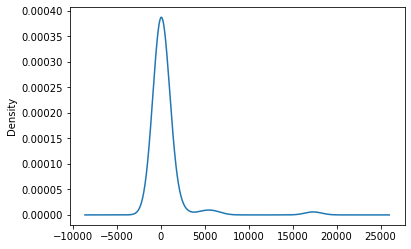

In [9]:
# Visualize the value counts of CLASSIFICATION
CLASSIFICATION= application_2_df.CLASSIFICATION.value_counts()
CLASSIFICATION
CLASSIFICATION.plot.density()

In [10]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(CLASSIFICATION[CLASSIFICATION < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_2_df.CLASSIFICATION = application_2_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_2_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_2_df.dtypes[application_2_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Check the number of unique values in each column
application_2_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_2_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/juliaheuer/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [16]:
# Merge one-hot encoded features and drop the originals

application_2_df = application_2_df.merge(encode_df,left_index=True, right_index=True)
application_2_df = application_2_df.drop(application_cat,1)
application_2_df.head()

/Users/juliaheuer/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [17]:
# Split our preprocessed data into our features and target arrays
y = application_2_df.IS_SUCCESSFUL.values
X = application_2_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


2022-01-31 13:20:29.236733: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [22]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:18 - loss: 4062.0027 - accuracy: 0.5000
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 21/804 [..............................] - ETA: 1s - loss: 7674.3618 - accuracy: 0.4539  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 44/804 [>.............................] - ETA: 1s - loss: 5851.1748 - accuracy: 0.4737
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model 

525/804 [==================>...........] - ETA: 0s - loss: 22588.0332 - accuracy: 0.4960
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 21757.7988 - accuracy: 0.4946
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 21625.4102 - accuracy: 0.4940
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoint


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 17798.5000 - accuracy: 0.5002
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 16482.2559 - accuracy: 0.4988
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 15286.3555 

796/804 [============================>.] - ETA: 0s - loss: 46387.0234 - accuracy: 0.4911
Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 45943.5547 - accuracy: 0.4906
Epoch 3/100
  1/804 [..............................] - ETA: 1s - loss: 731.5179 - accuracy: 0.5312
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 22/804 [..............................] - ETA: 1s - loss: 110091.4531 - accuracy: 0.4446
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 33293.3164 - accuracy: 0.4781
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 32141.9961 - accuracy: 0.4775
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 30815.4473 - accuracy: 0.4778
Epoch 00003: saving model to checkpoint


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 3210.9375 - accuracy: 0.5159
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 3322.2715 - accuracy: 0.5158
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 3379.3110 - a

773/804 [===========================>..] - ETA: 0s - loss: 17033.9629 - accuracy: 0.4967
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
796/804 [============================>.] - ETA: 0s - loss: 16546.4844 - accuracy: 0.4983
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 16390.2070 - accuracy: 0.4983
Epoch 5/100
  1/804 [..............................] - ETA: 0s - loss: 52.2227 - accuracy: 0.4062
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.h


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
509/804 [=================>............] - ETA: 0s - loss: 23141.8770 - accuracy: 0.5190
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 22508.8594 - accuracy: 0.5184
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 21564.8379 - accuracy: 0.5169
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoint


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 5775.3799 - accuracy: 0.5266
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 9758.3848 - accuracy: 0.5271
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 10214.9395 - 


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 42574.7070 - accuracy: 0.5030
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
789/804 [============================>.] - ETA: 0s - loss: 41299.5352 - accuracy: 0.5017
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 40570.2188 - accuracy: 0.5008
Epoch 7/100

Epoch 00007: saving model to checkpoints/weights.07.hdf5
  1/804 [..............................] - ETA: 6s - loss: 222.6383 - accuracy: 0.4688
Epoch 00007: saving model to checkpoints/weights.07.

486/804 [=================>............] - ETA: 0s - loss: 7581.6670 - accuracy: 0.5072
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 7293.8887 - accuracy: 0.5092
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 7061.6685 - accuracy: 0.5106
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/w

210/804 [======>.......................] - ETA: 1s - loss: 18132.0039 - accuracy: 0.4963
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 16420.1445 - accuracy: 0.4987
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 14942.4287 - accuracy: 0.5000
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoint


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 22091.7227 - accuracy: 0.5092
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 21483.7422 - accuracy: 0.5098
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
800/804 [============================>.] - ETA: 0s - loss: 20892.9141 - accuracy: 0.5129
Epoch 00008: saving model to checkpoints/weights.08.hdf5
804/804 [==============================]

467/804 [================>.............] - ETA: 0s - loss: 13137.8975 - accuracy: 0.5132
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
488/804 [=================>............] - ETA: 0s - loss: 12666.1074 - accuracy: 0.5129
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 12122.1992 - accuracy: 0.5145
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoint

184/804 [=====>........................] - ETA: 1s - loss: 4648.0122 - accuracy: 0.4794
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 9725.3770 - accuracy: 0.4782
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 9971.2422 - accuracy: 0.4789
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/w


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 14771.3584 - accuracy: 0.5032
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 14428.8262 - accuracy: 0.5016
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 14344.6396 - accuracy: 0.5012
Epoch 00010: saving model to checkpoint

434/804 [===============>..............] - ETA: 0s - loss: 2572.0959 - accuracy: 0.5085
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
455/804 [===============>..............] - ETA: 0s - loss: 2465.2351 - accuracy: 0.5104
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
480/804 [================>.............] - ETA: 0s - loss: 2408.3560 - accuracy: 0.5111
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/w


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 956.3632 - accuracy: 0.5675
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 1473.0676 - accuracy: 0.5637
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 1924.7979 - accuracy: 0.5608
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/we

681/804 [========================>.....] - ETA: 0s - loss: 5680.2598 - accuracy: 0.5380
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 5512.0991 - accuracy: 0.5381
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 5364.8208 - accuracy: 0.5360
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/w

372/804 [============>.................] - ETA: 1s - loss: 6422.4248 - accuracy: 0.4901
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
397/804 [=============>................] - ETA: 1s - loss: 6032.7573 - accuracy: 0.4928
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 5813.1060 - accuracy: 0.4917
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/w


Epoch 00014: saving model to checkpoints/weights.14.hdf5
 94/804 [==>...........................] - ETA: 1s - loss: 21042.3398 - accuracy: 0.5103
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
108/804 [===>..........................] - ETA: 1s - loss: 18403.3145 - accuracy: 0.5041
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 17026.1875 - accuracy: 0.4979
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoint

623/804 [======================>.......] - ETA: 0s - loss: 11525.9248 - accuracy: 0.4904
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 11261.7354 - accuracy: 0.4898
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 11103.2197 - accuracy: 0.4900
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
683/804 [========================>.....]


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
357/804 [============>.................] - ETA: 1s - loss: 2023.6077 - accuracy: 0.5101
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
379/804 [=============>................] - ETA: 1s - loss: 1955.4829 - accuracy: 0.5116
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
403/804 [==============>...............] - ETA: 0s - loss: 2051.4009 - accuracy: 0.5114
Epoch 00015: saving model to checkpoints/w


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 74/804 [=>............................] - ETA: 1s - loss: 1439.0875 - accuracy: 0.4726
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 95/804 [==>...........................] - ETA: 1s - loss: 1660.1208 - accuracy: 0.4747
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 1391.7864 - accuracy: 0.4790
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/w


Epoch 00016: saving model to checkpoints/weights.16.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 2250.8943 - accuracy: 0.4984
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 8721.7705 - accuracy: 0.4998
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 8583.2900 - accuracy: 0.5017
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/w


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 10292.1992 - accuracy: 0.4918
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 9671.4287 - accuracy: 0.4939 
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
370/804 [============>.................] - ETA: 1s - loss: 9050.2490 - accuracy: 0.4965
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 419.1481 - accuracy: 0.5559
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 71/804 [=>............................] - ETA: 1s - loss: 394.1394 - accuracy: 0.5660
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 92/804 [==>...........................] - ETA: 1s - loss: 359.9231 - accuracy: 0.5594
Epoch 00018: saving model to checkpoints/weig


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 1153.9304 - accuracy: 0.5271
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 1126.5598 - accuracy: 0.5259
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 1123.9187 - accuracy: 0.5263
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/w


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 1685.5488 - accuracy: 0.5151
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 1580.0823 - accuracy: 0.5154
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 1568.1069 - accuracy: 0.5155
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/w

Epoch 20/100
  1/804 [..............................] - ETA: 1s - loss: 49.8415 - accuracy: 0.5625
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 24/804 [..............................] - ETA: 1s - loss: 23.3659 - accuracy: 0.5273
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 33.5291 - accuracy: 0.5386
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkp


Epoch 00020: saving model to checkpoints/weights.20.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 807.2149 - accuracy: 0.5206
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 779.5374 - accuracy: 0.5207
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 752.5742 - accuracy: 0.5211
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weig


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 125.4844 - accuracy: 0.5263
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 116.0767 - accuracy: 0.5252
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 109.8968 - accuracy: 0.5249
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weig


Epoch 00021: saving model to checkpoints/weights.21.hdf5
780/804 [============================>.] - ETA: 0s - loss: 891.8232 - accuracy: 0.5196
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 865.7740 - accuracy: 0.5229
Epoch 22/100

Epoch 00022: saving model to checkpoints/weights.22.hdf5
  1/804 [..............................] - ETA: 6s - loss: 25.0679 - accuracy: 0.4688
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 22/804 [..............................] - ETA: 1s - loss: 86.5423 - accuracy: 0.5355
Epoch 00022: saving model to checkpoints/weights.22.hdf5

E


Epoch 00022: saving model to checkpoints/weights.22.hdf5
509/804 [=================>............] - ETA: 0s - loss: 163.1674 - accuracy: 0.5837
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 162.6639 - accuracy: 0.5793
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 159.9503 - accuracy: 0.5757
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weig

227/804 [=======>......................] - ETA: 1s - loss: 1226.7109 - accuracy: 0.5000
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 1240.0459 - accuracy: 0.5009
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 1168.9716 - accuracy: 0.5019
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
291/804 [=========>....................] - 

771/804 [===========================>..] - ETA: 0s - loss: 657.0677 - accuracy: 0.5118
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
792/804 [============================>.] - ETA: 0s - loss: 640.1208 - accuracy: 0.5117
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 630.7230 - accuracy: 0.5121
Epoch 24/100
  1/804 [..............................] - ETA: 1s - loss: 0.9675 - accuracy: 0.4688
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

E


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
508/804 [=================>............] - ETA: 0s - loss: 3.1032 - accuracy: 0.5327
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 2.9921 - accuracy: 0.5337
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 2.8986 - accuracy: 0.5344
Epoch 00024: saving model to checkpoints/weights.24


Epoch 00025: saving model to checkpoints/weights.25.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.6938 - accuracy: 0.5294
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.6937 - accuracy: 0.5290
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6938 - accuracy: 0.5284
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6920 - accuracy: 0.5322
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5324
Epoch 00025: saving model to checkpoints/weights.25.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6919 - accuracy: 0.5324
Epoch 26/100
  1/804 [..............................] - ETA: 1s - loss: 0.6823 - accuracy: 0.5938
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 0


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26

206/804 [======>.......................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5382
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5387
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/804 [==============================] - 2s 2ms/st


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
472/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28

168/804 [=====>........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5273
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5259
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
228/804 [=======>......................] - ETA: 1s -

702/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
429/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
155/804 [====>.........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 00031: saving model to checkpoints/weights.31

677/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31

396/804 [=============>................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5349
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
441/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5395
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5428
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
187/804 [=====>.....


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34


Epoch 00035: saving model to checkpoints/weights.35.hdf5
 96/804 [==>...........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5371
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 

360/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5378
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
385/804 [=============>................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5365
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 0.6905 - accuracy: 0.5367
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
111/804 [===>..........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 0.6911 - accuracy: 


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 

359/804 [============>.................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
407/804 [==============>...............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38


Epoch 00039: saving model to checkpoints/weights.39.hdf5
 93/804 [==>...........................] - ETA: 1s - loss: 0.6888 - accuracy: 0.5501
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 0.6886 - accuracy: 0.5508
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6891 - accuracy: 0.5476
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39


Epoch 00039: saving model to checkpoints/weights.39.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39

344/804 [===========>..................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
389/804 [=============>................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40

 69/804 [=>............................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 90/804 [==>...........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5261
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41

604/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41

323/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5297
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5305
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 72/804 [=>............................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5252
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 95/804 [==>...........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5243
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.6919 - accuracy: 

594/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
382/804 [=============>................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44

 49/804 [>.............................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 71/804 [=>............................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5238
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 94/804 [==>...........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5243
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5307
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45


Epoch 00046: saving model to checkpoints/weights.46.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5389
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5384
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5376
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46

 26/804 [..............................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 50/804 [>.............................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5369
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 71/804 [=>............................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47

558/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5358
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5351
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6907 - accuracy: 


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5359
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 68/804 [=>............................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5294
Epoch 00049: saving model to checkpoints/weights.49


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5353
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00049: saving model to checkpoints/weights.49


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5348
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5360
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00050: saving model to checkpoints/weights.50

Epoch 51/100
  1/804 [..............................] - ETA: 1s - loss: 0.6801 - accuracy: 0.6250
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 25/804 [..............................] - ETA: 1s - loss: 0.6929 - accuracy: 0.5175
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5293
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoin


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00051: saving model to checkpoints/weights.51

266/804 [========>.....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5268
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5260
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5281
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
326/804 [===========>..................] - ETA: 1s -

800/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00052: saving model to checkpoints/weights.52.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 53/100
  1/804 [..............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 22/804 [..............................] - ETA: 2s - loss: 0.6935 - accuracy: 0.5142
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.6922 

502/804 [=================>............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5360
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53

233/804 [=======>......................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5370
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5373
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54


Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00054: saving model to checkpoints/weights.54.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 55/100
  1/804 [..............................] - ETA: 1s - loss: 0.6838 - accuracy: 0.5938
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 0

499/804 [=================>............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55


Epoch 00056: saving model to checkpoints/weights.56.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5352
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56

769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 57/100

Epoch 00057: saving model to checkpoints/weights.57.hdf5
  1/804 [..............................] - ETA: 6s - loss: 0.6844 - accuracy: 0.5938
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 0

496/804 [=================>............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57

227/804 [=======>......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5376
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5358
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 59/100
  1/804 [..............................] - ETA: 0s - loss: 0.6986 - accuracy: 0.4688
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 23/804 [.........................

496/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5351
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59


Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5190
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5203
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5219
Epoch 00060: saving model to checkpoints/weights.60


Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5330
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 61/100
  1/804 [..............................] - ETA: 1s - loss: 0.7059 - accuracy: 0.4375
Epoch 0


Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
495/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 00061: saving model to checkpoints/weights.61


Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 00062: saving model to checkpoints/weights.62


Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00062: saving model to checkpoints/weights.62.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 63/100
  1/804 [..............................] - ETA: 1s - loss: 0.7167 - accuracy: 0.3438
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 0


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
547/804 [===========


Epoch 00064: saving model to checkpoints/weights.64.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5409
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5395
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5394
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5324
Epoch 65/100
  1/804 [..............................] - ETA: 1s - loss: 0.6987 - accuracy: 0.4688
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 0

479/804 [================>.............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5294
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
503/804 [=================>............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5271
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5290
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
270/804 [=========>.

740/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 2s 2ms/st

461/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5300
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
483/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67

185/804 [=====>........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
204/804 [======>.......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5345
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5296
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5287
Epoch 00068: saving model


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68

438/804 [===============>..............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
462/804 [================>.............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
483/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69

169/804 [=====>........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5388
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5408
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5421
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70


Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00070: saving model to checkpoints/weights.70


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71

165/804 [=====>........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5377
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5360
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72

705/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72

422/804 [==============>...............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5289
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
467/804 [================>.............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
163/804 [=====>........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5286
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5299
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74

693/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74

419/804 [==============>...............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5355
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
443/804 [===============>..............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5355
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
464/804 [================>.............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75

145/804 [====>.........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5287
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5283
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5255
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
205/804 [======>.......................] - ETA: 1s -


Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76


Epoch 00077: saving model to checkpoints/weights.77.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
441/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
464/804 [================>.............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77

137/804 [====>.........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5246
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5295
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78


Epoch 00078: saving model to checkpoints/weights.78.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78


Epoch 00079: saving model to checkpoints/weights.79.hdf5
408/804 [==============>...............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5349
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
432/804 [===============>..............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5357
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79


Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
163/804 [=====>........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
184/804 [=====>........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5370
Epoch 00080: saving model to checkpoints/weights.80

662/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80


Epoch 00081: saving model to checkpoints/weights.81.hdf5
389/804 [=============>................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
435/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81


Epoch 00082: saving model to checkpoints/weights.82.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5224
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5275
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5274
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82


Epoch 00082: saving model to checkpoints/weights.82.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
392/804 [=============>................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5351
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83

113/804 [===>..........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5346
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5340
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5361
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 00084: saving model to checkpoints/weights.84


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
434/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 

100/804 [==>...........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5387
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
125/804 [===>..........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5397
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86


Epoch 00086: saving model to checkpoints/weights.86.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5346
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86

366/804 [============>.................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
390/804 [=============>................] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
411/804 [==============>...............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87


Epoch 00088: saving model to checkpoints/weights.88.hdf5
 92/804 [==>...........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5285
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5248
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5237
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88

622/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88

343/804 [===========>..................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5374
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
388/804 [=============>................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5358
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89

 64/804 [=>............................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5391
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5365
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
108/804 [===>..........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5385
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90


Epoch 00090: saving model to checkpoints/weights.90.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90


Epoch 00091: saving model to checkpoints/weights.91.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91

 50/804 [>.............................] - ETA: 1s - loss: 0.6935 - accuracy: 0.5119
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 71/804 [=>............................] - ETA: 1s - loss: 0.6932 - accuracy: 0.5136
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 95/804 [==>...........................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5214
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92

579/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5270
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5271
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93

 23/804 [..............................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5408
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 45/804 [>.............................] - ETA: 1s - loss: 0.6884 - accuracy: 0.5507
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 68/804 [=>............................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5391
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94

563/804 [====================>.........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5280
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5280
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5290
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94

284/804 [=========>....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5275
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5287
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 25/804 [..............................] - ETA: 1s - loss: 0.6880 - accuracy: 0.5525
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 50/804 [>.............................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5419
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 75/804 [=>.........


Epoch 00096: saving model to checkpoints/weights.96.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5298
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5290
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96

275/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5283
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97

Epoch 98/100
  1/804 [..............................] - ETA: 1s - loss: 0.6955 - accuracy: 0.5000
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 22/804 [..............................] - ETA: 2s - loss: 0.6877 - accuracy: 0.5554
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5408
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoin


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5361
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00098: saving model to checkpoints/weights.98


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5366
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5364
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5364
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99

804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5324
Epoch 100/100
  1/804 [..............................] - ETA: 1s - loss: 0.6990 - accuracy: 0.4688
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 24/804 [..............................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5391
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 49/804 [>.............................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5274
Epoch 00100: saving model to checkpoints/weights.100.h

523/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoint

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6853 - accuracy: 0.6146 - 250ms/epoch - 935us/step
Loss: 0.6853005290031433, Accuracy: 0.6145772337913513


# Deliverable 3: Compile, Train and Evaluate the Model


## Attempt 1 - Adding more nodes to layers

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4400      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 9,501
Trainable params: 9,501
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [28]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 3:43 - loss: 1792.5815 - accuracy: 0.5312
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 21/804 [..............................] - ETA: 1s - loss: 46671.3555 - accuracy: 0.5610 
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 44/804 [>.............................] - ETA: 1s - loss: 30824.8379 - accuracy: 0.5405
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model

530/804 [==================>...........] - ETA: 0s - loss: 229833.7656 - accuracy: 0.4882
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 222481.8125 - accuracy: 0.4870
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 214446.9219 - accuracy: 0.4862
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpo

251/804 [========>.....................] - ETA: 1s - loss: 15269.9600 - accuracy: 0.5047
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 14148.7188 - accuracy: 0.4986
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 13462.2256 - accuracy: 0.4957
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
796/804 [============================>.] - ETA: 0s - loss: 27624.1992 - accuracy: 0.4982
Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 27376.3184 - accuracy: 0.4988
Epoch 3/100
  1/804 [..............................] - ETA: 1s - loss: 124.8327 - accuracy: 0.4688
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 22/804 [..............................] - ETA: 2s - loss: 377.5790 - accuracy: 0.4943
Epoch 00003: saving model to checkpoints/weights.03.hd

497/804 [=================>............] - ETA: 0s - loss: 8696.1445 - accuracy: 0.4960
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 8326.4141 - accuracy: 0.4969
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 8133.8350 - accuracy: 0.4982
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/w


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 36751.8789 - accuracy: 0.4722
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 33623.4844 - accuracy: 0.4725
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 33690.0078 - accuracy: 0.4724
Epoch 00004: saving model to checkpoint


Epoch 00004: saving model to checkpoints/weights.04.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 36601.5352 - accuracy: 0.5004
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 35723.3516 - accuracy: 0.4995
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
798/804 [============================>.] - ETA: 0s - loss: 35066.9805 - accuracy: 0.4978
Epoch 00004: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 34822.7109 - accuracy: 0.4976
Epoch


Epoch 00005: saving model to checkpoints/weights.05.hdf5
469/804 [================>.............] - ETA: 0s - loss: 38450.6250 - accuracy: 0.5132
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
493/804 [=================>............] - ETA: 0s - loss: 38805.5742 - accuracy: 0.5143
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 37661.2344 - accuracy: 0.5152
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoint


Epoch 00006: saving model to checkpoints/weights.06.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 780.8158 - accuracy: 0.4961
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 920.1074 - accuracy: 0.4978
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 846.3585 - accuracy: 0.5040
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weig


Epoch 00006: saving model to checkpoints/weights.06.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 4678.4175 - accuracy: 0.5074
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 4534.2686 - accuracy: 0.5078
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 4405.8540 - accuracy: 0.5057
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/w

423/804 [==============>...............] - ETA: 0s - loss: 4665.8638 - accuracy: 0.5075
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
446/804 [===============>..............] - ETA: 0s - loss: 4607.5044 - accuracy: 0.5088
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
470/804 [================>.............] - ETA: 0s - loss: 7000.6167 - accuracy: 0.5089
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/w

137/804 [====>.........................] - ETA: 1s - loss: 1738.1221 - accuracy: 0.4941
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 1516.8109 - accuracy: 0.4863
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 1360.3094 - accuracy: 0.4870
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/w


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 1951.0631 - accuracy: 0.5056
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 2077.6858 - accuracy: 0.5065
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 2017.8738 - accuracy: 0.5073
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/w


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
400/804 [=============>................] - ETA: 0s - loss: 8145.7148 - accuracy: 0.5057
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 7877.9541 - accuracy: 0.5066
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
443/804 [===============>..............] - ETA: 0s - loss: 7609.7729 - accuracy: 0.5083
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/w


Epoch 00010: saving model to checkpoints/weights.10.hdf5
113/804 [===>..........................] - ETA: 1s - loss: 2663.0095 - accuracy: 0.4652
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
134/804 [====>.........................] - ETA: 1s - loss: 2509.0469 - accuracy: 0.4655
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 2149.5806 - accuracy: 0.4753
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/w

624/804 [======================>.......] - ETA: 0s - loss: 11833.0742 - accuracy: 0.4911
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 11591.1045 - accuracy: 0.4920
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 11767.1885 - accuracy: 0.4938
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoint

340/804 [===========>..................] - ETA: 1s - loss: 11675.6846 - accuracy: 0.4926
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
363/804 [============>.................] - ETA: 1s - loss: 11191.5615 - accuracy: 0.4958
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
385/804 [=============>................] - ETA: 0s - loss: 10731.1797 - accuracy: 0.4968
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoint


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 70/804 [=>............................] - ETA: 1s - loss: 10227.9980 - accuracy: 0.5348
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 91/804 [==>...........................] - ETA: 1s - loss: 10961.2441 - accuracy: 0.5295
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
114/804 [===>..........................] - ETA: 1s - loss: 11987.7334 - accuracy: 0.5312
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoint


Epoch 00012: saving model to checkpoints/weights.12.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 4541.2378 - accuracy: 0.5162
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 4443.6572 - accuracy: 0.5147
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 6267.5562 - accuracy: 0.5142
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/w


Epoch 00013: saving model to checkpoints/weights.13.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 8857.9385 - accuracy: 0.4787
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 8391.4092 - accuracy: 0.4770
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
352/804 [============>.................] - ETA: 1s - loss: 7904.9487 - accuracy: 0.4760
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/w


Epoch 00014: saving model to checkpoints/weights.14.hdf5
 23/804 [..............................] - ETA: 1s - loss: 131.4298 - accuracy: 0.5041
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 425.6547 - accuracy: 0.4830
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 68/804 [=>............................] - ETA: 1s - loss: 1003.5634 - accuracy: 0.4775
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/wei


Epoch 00014: saving model to checkpoints/weights.14.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 18782.5332 - accuracy: 0.4871
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 18075.2188 - accuracy: 0.4867
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 17420.3984 - accuracy: 0.4862
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoint

254/804 [========>.....................] - ETA: 1s - loss: 2387.7371 - accuracy: 0.5122
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 2287.2588 - accuracy: 0.5063
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 2152.0876 - accuracy: 0.5040
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
316/804 [==========>...................] - 


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
789/804 [============================>.] - ETA: 0s - loss: 1686.9351 - accuracy: 0.5056
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 1663.4133 - accuracy: 0.5047
Epoch 16/100
  1/804 [..............................] - ETA: 1s - loss: 41.6745 - accuracy: 0.4375
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 25/804 [..............................] - ETA: 1s - loss: 241.4767 - accuracy: 0.458

493/804 [=================>............] - ETA: 0s - loss: 15199.4355 - accuracy: 0.5020
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 14553.7285 - accuracy: 0.5038
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 14098.6543 - accuracy: 0.5040
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoint

209/804 [======>.......................] - ETA: 1s - loss: 704.7390 - accuracy: 0.4737
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 686.3073 - accuracy: 0.4738
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 670.8838 - accuracy: 0.4755
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weig


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 1156.7501 - accuracy: 0.4963
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 1139.3909 - accuracy: 0.4971
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
790/804 [============================>.] - ETA: 0s - loss: 1170.3813 - accuracy: 0.4987
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/w


Epoch 00018: saving model to checkpoints/weights.18.hdf5
456/804 [================>.............] - ETA: 0s - loss: 1625.7124 - accuracy: 0.5003
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
472/804 [================>.............] - ETA: 0s - loss: 1572.9756 - accuracy: 0.5007
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
494/804 [=================>............] - ETA: 0s - loss: 1503.5261 - accuracy: 0.5017
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/w

167/804 [=====>........................] - ETA: 1s - loss: 948.0300 - accuracy: 0.5245 
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 843.0245 - accuracy: 0.5249
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 773.0839 - accuracy: 0.5233
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/wei


Epoch 00019: saving model to checkpoints/weights.19.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 264.9051 - accuracy: 0.5230
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 261.9677 - accuracy: 0.5231
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 255.7914 - accuracy: 0.5233
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weig

418/804 [==============>...............] - ETA: 0s - loss: 0.7978 - accuracy: 0.5330
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 0.7947 - accuracy: 0.5333
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
462/804 [================>.............] - ETA: 0s - loss: 0.7917 - accuracy: 0.5333
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20


Epoch 00021: saving model to checkpoints/weights.21.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6968 - accuracy: 0.5424
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.6951 - accuracy: 0.5461
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 0.6951 - accuracy: 0.5454
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21

665/804 [=======================>......] - ETA: 0s - loss: 0.6951 - accuracy: 0.5322
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6948 - accuracy: 0.5331
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6948 - accuracy: 0.5324
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
401/804 [=============>................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
422/804 [==============>...............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
441/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22

107/804 [==>...........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
131/804 [===>..........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5229
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
152/804 [====>.........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5236
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23


Epoch 00023: saving model to checkpoints/weights.23.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5287
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24


Epoch 00025: saving model to checkpoints/weights.25.hdf5
 91/804 [==>...........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
104/804 [==>...........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
124/804 [===>..........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5300
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
147/804 [====>.........................] - ETA: 1s -


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25

337/804 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5359
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5353
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 66/804 [=>............................] - ETA: 1s - loss: 0.6871 - accuracy: 0.5611
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 88/804 [==>...........................] - ETA: 1s - loss: 0.6872 - accuracy: 0.5597
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
111/804 [===>..........................] - ETA: 1s - loss: 0.6876 - accuracy: 0.5569
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27


Epoch 00027: saving model to checkpoints/weights.27.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27


Epoch 00028: saving model to checkpoints/weights.28.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5413
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5407
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5399
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28

 42/804 [>.............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 63/804 [=>............................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5298
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 87/804 [==>...........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5370
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29

576/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29


Epoch 00030: saving model to checkpoints/weights.30.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5384
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5390
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5389
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30

Epoch 31/100
  1/804 [..............................] - ETA: 1s - loss: 0.7016 - accuracy: 0.4375
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 22/804 [..............................] - ETA: 1s - loss: 0.6930 - accuracy: 0.5156
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 44/804 [>.............................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5185
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 64/804 [=>............................

520/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
581/804 [====================>.........] - ETA: 0s -

231/804 [=======>......................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5400
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5415
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5379
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
295/804 [==========>...................] - ETA: 1s -

756/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00032: saving model to checkpoints/weights.32.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 33/100
  1/804 [..............................] - ETA: 1s - loss: 0.6985 - accuracy: 0.4688
Epoch 00033: saving model to checkpoint

476/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5245
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5252
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00034: saving model to checkpoints/weights.34


Epoch 00034: saving model to checkpoints/weights.34.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34


Epoch 00035: saving model to checkpoints/weights.35.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35

157/804 [====>.........................] - ETA: 1s - loss: 0.6928 - accuracy: 0.5183
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.6929 - accuracy: 0.5168
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5195
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36

677/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36

401/804 [=============>................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
446/804 [===============>..............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37


Epoch 00038: saving model to checkpoints/weights.38.hdf5
129/804 [===>..........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5392
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5379
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5382
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38


Epoch 00038: saving model to checkpoints/weights.38.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
422/804 [==============>...............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5287
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39

 87/804 [==>...........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5266
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
109/804 [===>..........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40

621/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40

339/804 [===========>..................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5399
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5380
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
384/804 [=============>................] - ETA: 0s - loss: 0.6905 - accuracy: 0.5369
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 66/804 [=>............................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5388
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 89/804 [==>...........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
111/804 [===>..........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42


Epoch 00042: saving model to checkpoints/weights.42.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5305
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 00043: saving model to checkpoints/weights.43

 23/804 [..............................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5448
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5435
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 68/804 [=>............................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44


Epoch 00044: saving model to checkpoints/weights.44.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 00045: saving model to checkpoints/weights.45

  1/804 [..............................] - ETA: 1s - loss: 0.6961 - accuracy: 0.4688
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 22/804 [..............................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5156
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 44/804 [>.............................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5192
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5296
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5307
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46

251/804 [========>.....................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5186
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5197
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5208
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5325
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5324
Epoch 48/100
  1/804 [..............................] - ETA: 1s - loss: 0.6862 - accuracy: 0.5938
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 22/804 [..............................] - ETA: 2s - loss: 0.6942 - accuracy: 0.5014
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 0

506/804 [=================>............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5292
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5295
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5299
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48

223/804 [=======>......................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5405
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5401
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5386
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5324
Epoch 50/100
  1/804 [..............................] - ETA: 0s - loss: 0.6992 - accuracy: 0.4688
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 0


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5293
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.6918 - accuracy: 


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51


Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5287
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5290
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5296
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5362
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5388
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5381
Epoch 00053: saving model to checkpoints/weights.53


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5323
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53

428/804 [==============>...............] - ETA: 0s - loss: 0.6918 - accuracy: 0.5278
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5292
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5289
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54


Epoch 00055: saving model to checkpoints/weights.55.hdf5
152/804 [====>.........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5308
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5350
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5327
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55

403/804 [==============>...............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
425/804 [==============>...............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56


Epoch 00057: saving model to checkpoints/weights.57.hdf5
128/804 [===>..........................] - ETA: 1s - loss: 0.6877 - accuracy: 0.5547
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6882 - accuracy: 0.5519
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.6889 - accuracy: 0.5476
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57


Epoch 00057: saving model to checkpoints/weights.57.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57

379/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5306
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5306
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
113/804 [===>..........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5315
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5255
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5297
Epoch 00059: saving model to checkpoints/weights.59


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 00059: saving model to checkpoints/weights.59.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59

354/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5341
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5351
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60


Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 91/804 [==>...........................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5412
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
112/804 [===>..........................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5438
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
130/804 [===>..........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5373
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61

617/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61

332/804 [===========>..................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5404
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5401
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5373
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
393/804 [=============>................] - ETA: 0s -

 44/804 [>.............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 66/804 [=>............................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 85/804 [==>...........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.6918 - accuracy: 0.5282
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5290
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 00063: saving model to checkpoints/weights.63


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5275
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5283
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5267
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 24/804 [..............................] - ETA: 1s - loss: 0.6939 - accuracy: 0.5182
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 0.6932 - accuracy: 0.5211
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 69/804 [=>............................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5258
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65


Epoch 00065: saving model to checkpoints/weights.65.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5310
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65

268/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5333
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66

798/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 00066: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 67/100

Epoch 00067: saving model to checkpoints/weights.67.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.6868 - accuracy: 0.5625
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 22/804 [..............................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5440
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 44/804 [>.............................] - ETA: 1s - loss: 0.6916 


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5316
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67


Epoch 00068: saving model to checkpoints/weights.68.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5348
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5353
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5378
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68

752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5337
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5337
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 69/100
  1/804 [..............................] - ETA: 1s - loss: 0.6914 


Epoch 00069: saving model to checkpoints/weights.69.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5339
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5348
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69


Epoch 00070: saving model to checkpoints/weights.70.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5355
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5341
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70


Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 00070: saving model to checkpoints/weights.70

447/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5344
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5356
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5362
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5443
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5448
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.6893 - accuracy: 0.5453
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72


Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
432/804 [===============>..............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5331
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5326
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 00074: saving model to checkpoints/weights.74


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74


Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5385
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.6905 - accuracy: 0.5391
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
469/804 [================>.............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5388
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75

136/804 [====>.........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5368
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5396
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5392
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76


Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5327
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
413/804 [==============>...............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5326
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77


Epoch 00078: saving model to checkpoints/weights.78.hdf5
103/804 [==>...........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5282
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
127/804 [===>..........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5285
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5302
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78

634/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78

351/804 [============>.................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5402
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5381
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
395/804 [=============>................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5397
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79

 66/804 [=>............................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5426
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 88/804 [==>...........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5387
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
109/804 [===>..........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5341
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80

597/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
657/804 [=======================>......] - ETA: 0s -

314/804 [==========>...................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5424
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5401
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5403
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81


Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 45/804 [>.............................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5333
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 66/804 [=>............................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5256
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5266
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82

556/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5342
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5364
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5374
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5364
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83

Epoch 84/100
  1/804 [..............................] - ETA: 1s - loss: 0.6961 - accuracy: 0.5000
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 21/804 [..............................] - ETA: 1s - loss: 0.6891 - accuracy: 0.5506
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5321
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 58/804 [=>............................


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5310
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84

244/804 [========>.....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5359
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.5324
Epoch 86/100
  1/804 [..............................] - ETA: 1s - loss: 0.6504 - accuracy: 0.8125
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 25/804 [..............................] - ETA: 1s - loss: 0.6933 - accuracy: 0.5200
Epoch 0


Epoch 00086: saving model to checkpoints/weights.86.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5336
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5339
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5349
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86


Epoch 00087: saving model to checkpoints/weights.87.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5351
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5389
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5367
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87

757/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6914 - accuracy: 0.5324
Epoch 88/100
  1/804 [..............................] - ETA: 1s - loss: 0.6971 - accuracy: 0.5000
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 0

477/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5336
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88

193/804 [======>.......................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5317
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5289
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5302
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89

723/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5311
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
787/804 [============================>.] - ETA: 0s -

440/804 [===============>..............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5307
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5307
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
503/804 [=================>............] - ETA: 0s -


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5362
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5341
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5359
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5340
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91

411/804 [==============>...............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5359
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
435/804 [===============>..............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5359
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
456/804 [================>.............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5355
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5397
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
167/804 [=====>........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5395
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5378
Epoch 00093: saving model to checkpoints/weights.93

658/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5345
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
431/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94

 92/804 [==>...........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5309
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
114/804 [===>..........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5263
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5267
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95


Epoch 00095: saving model to checkpoints/weights.95.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5304
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5296
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95

344/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5288
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
387/804 [=============>................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5282
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96


Epoch 00097: saving model to checkpoints/weights.97.hdf5
 70/804 [=>............................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5254
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 91/804 [==>...........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5282
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
113/804 [===>..........................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97

315/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5369
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98


Epoch 00099: saving model to checkpoints/weights.99.hdf5
 43/804 [>.............................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5254
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 63/804 [=>............................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5243
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 85/804 [==>...........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5254
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99

576/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99


Epoch 00100: saving model to checkpoints/weights.100.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5253
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5267
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5264
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoint

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6911 - accuracy: 0.5324 - 208ms/epoch - 774us/step
Loss: 0.6911457180976868, Accuracy: 0.5323615074157715


Less accurate than original 

## Attempt 2 - adding additional hidden layers 

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3520      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 15)                465       
                                                                 
 dense_9 (Dense)             (None, 1)                 16        
                                                                 
Total params: 6,431
Trainable params: 6,431
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [33]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:03 - loss: 111.0666 - accuracy: 0.5938
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 2s - loss: 2849.3843 - accuracy: 0.4859 
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 1s - loss: 53103.2109 - accuracy: 0.4906
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 60/804 [=>.................

520/804 [==================>...........] - ETA: 0s - loss: 29315.7148 - accuracy: 0.5036
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 29023.9727 - accuracy: 0.5036
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 31665.9395 - accuracy: 0.5049
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
580/804 [====================>.........]

221/804 [=======>......................] - ETA: 1s - loss: 26273.3477 - accuracy: 0.4805
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 31596.7793 - accuracy: 0.4844
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 36311.8906 - accuracy: 0.4886
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
281/804 [=========>....................]


Epoch 00002: saving model to checkpoints/weights.02.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 20634.1934 - accuracy: 0.5070
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 20174.9805 - accuracy: 0.5055
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
781/804 [============================>.] - ETA: 0s - loss: 19704.6367 - accuracy: 0.5036
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint

437/804 [===============>..............] - ETA: 0s - loss: 18225.4609 - accuracy: 0.5151
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
457/804 [================>.............] - ETA: 0s - loss: 20823.2598 - accuracy: 0.5129
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
477/804 [================>.............] - ETA: 0s - loss: 20073.2305 - accuracy: 0.5136
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
497/804 [=================>............]

138/804 [====>.........................] - ETA: 1s - loss: 6753.1997 - accuracy: 0.4823
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 5928.4849 - accuracy: 0.4771
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 5364.5854 - accuracy: 0.4782
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
198/804 [======>.......................] - 


Epoch 00004: saving model to checkpoints/weights.04.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 3876.5544 - accuracy: 0.4892
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 3903.6411 - accuracy: 0.4886
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 3915.4749 - accuracy: 0.4876
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/w

349/804 [============>.................] - ETA: 1s - loss: 4962.6904 - accuracy: 0.5158
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
369/804 [============>.................] - ETA: 1s - loss: 4706.2100 - accuracy: 0.5164
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
389/804 [=============>................] - ETA: 1s - loss: 4531.7666 - accuracy: 0.5170
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
409/804 [==============>...............] - 


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 25783.0117 - accuracy: 0.5063
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 19398.0605 - accuracy: 0.4996
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 15519.2754 - accuracy: 0.4975
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoint


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 3239.9204 - accuracy: 0.4839
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 3261.0645 - accuracy: 0.4847
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 3162.9944 - accuracy: 0.4838
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/w


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 216.8970 - accuracy: 0.4968
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 292.5395 - accuracy: 0.4962
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 276.5948 - accuracy: 0.4989
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weig


Epoch 00007: saving model to checkpoints/weights.07.hdf5
784/804 [============================>.] - ETA: 0s - loss: 110.2015 - accuracy: 0.5184
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 107.4954 - accuracy: 0.5188
Epoch 8/100
  1/804 [..............................] - ETA: 1s - loss: 0.7467 - accuracy: 0.5312
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.7267 - accuracy: 0.5551
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoc


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.7214 - accuracy: 0.5316
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 0.7204 - accuracy: 0.5322
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.7195 - accuracy: 0.5330
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08


Epoch 00009: saving model to checkpoints/weights.09.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6939 - accuracy: 0.5352
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.6938 - accuracy: 0.5350
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.6940 - accuracy: 0.5341
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09

708/804 [=========================>....] - ETA: 0s - loss: 0.6929 - accuracy: 0.5324
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6928 - accuracy: 0.5329
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6926 - accuracy: 0.5338
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
768/804 [===========================>..] - ETA: 0s -

414/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
474/804 [================>.............] - ETA: 0s -


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5399
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
150/804 [====>.........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
170/804 [=====>........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11


Epoch 00012: saving model to checkpoints/weights.12.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6934 - accuracy: 0.5143
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.6930 - accuracy: 0.5175
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5245
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5325
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5332
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13


Epoch 00014: saving model to checkpoints/weights.14.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
333/804 [===========>..................] - ETA: 1s -

793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 15/100
  1/804 [..............................] - ETA: 1s - loss: 0.7001 - accuracy: 0.4688
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5219
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6913 

494/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
554/804 [===================>..........] - ETA: 0s -

200/804 [======>.......................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5361
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5357
Epoch 00016: saving model

715/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
775/804 [===========================>..] - ETA: 0s -

416/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
456/804 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
476/804 [================>.............] - ETA: 0s -

117/804 [===>..........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5267
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5265
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
177/804 [=====>........................] - ETA: 1s -

627/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
687/804 [========================>.....] - ETA: 0s -

328/804 [===========>..................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5388
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5384
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
388/804 [=============>................] - ETA: 1s -


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5377
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5387
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 79/804 [=>............................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5435
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5262
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5259
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5264
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 22/100

Epoch 00022: saving model to checkpoints/weights.22.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.6692 - accuracy: 0.6875
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5280
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 0


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5247
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5254
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5283
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5305
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23


Epoch 00024: saving model to checkpoints/weights.24.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24

119/804 [===>..........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
154/804 [====>.........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 00025: saving model

634/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
694/804 [========================>.....] - ETA: 0s -

335/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
395/804 [=============>................] - ETA: 1s -

 41/804 [>.............................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5328
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
101/804 [==>...........................] - ETA: 1s -

561/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
621/804 [======================>.......] - ETA: 0s -


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5349
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5372
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00028: saving model to checkpoints/weights.28.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 29/100
  1/804 [..............................] - ETA: 1s - loss: 0.6993 - accuracy: 0.4688
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 0

488/804 [=================>............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model

184/804 [=====>........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5234
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
204/804 [======>.......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5263
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5271
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
244/804 [========>.....................] - ETA: 1s -

699/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
759/804 [===========================>..] - ETA: 0s -


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33

 38/804 [>.............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5387
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5390
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 00034: saving model

545/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
603/804 [=====================>........] - ETA: 0s -

244/804 [========>.....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
304/804 [==========>...................] - ETA: 1s -


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 36/100
  1/804 [..............................] - ETA: 1s - loss: 0.6831 - accuracy: 0.5938
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 0


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5294
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
751/804 [===========================>..] - ETA: 0s -


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5294
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38

 98/804 [==>...........................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5204
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5249
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5274
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
158/804 [====>.........................] - ETA: 1s -

613/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
673/804 [========================>.....] - ETA: 0s -


Epoch 00040: saving model to checkpoints/weights.40.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5282
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40

  1/804 [..............................] - ETA: 1s - loss: 0.7036 - accuracy: 0.4375
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6875 - accuracy: 0.5594
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.6875 - accuracy: 0.5594
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.6890 - accuracy: 0.5481
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model

505/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
565/804 [====================>.........] - ETA: 0s -


Epoch 00042: saving model to checkpoints/weights.42.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5359
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42


Epoch 00042: saving model to checkpoints/weights.42.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42


Epoch 00043: saving model to checkpoints/weights.43.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5270
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5272
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44

319/804 [==========>...................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5361
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5357
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
379/804 [=============>................] - ETA: 1s -


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.6883 - accuracy: 0.5552
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.6892 - accuracy: 0.5481
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 70/804 [=>............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5393
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5267
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5268
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 48/100
  1/804 [..............................] - ETA: 1s - loss: 0.7030 - accuracy: 0.4375
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6951 - accuracy: 0.5000
Epoch 0

472/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
532/804 [==================>...........] - ETA: 0s -

173/804 [=====>........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
213/804 [======>.......................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5258
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
233/804 [=======>......................] - ETA: 1s -

693/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
753/804 [===========================>..] - ETA: 0s -

394/804 [=============>................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
454/804 [===============>..............] - ETA: 0s -

100/804 [==>...........................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5425
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5393
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
160/804 [====>.........................] - ETA: 1s -

615/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
675/804 [========================>.....] - ETA: 0s -

316/804 [==========>...................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5384
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5377
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
376/804 [=============>................] - ETA: 1s -

 18/804 [..............................] - ETA: 2s - loss: 0.6889 - accuracy: 0.5521
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.6874 - accuracy: 0.5633
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6881 - accuracy: 0.5565
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 77/804 [=>............................] - ETA: 1s -


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53


Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5222
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5239
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5238
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54


Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 55/100
  1/804 [..............................] - ETA: 1s - loss: 0.6955 - accuracy: 0.5000
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 0


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55

175/804 [=====>........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
235/804 [=======>......................] - ETA: 1s -

695/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
755/804 [===========================>..] - ETA: 0s -

401/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5273
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5279
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
441/804 [===============>..............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
461/804 [================>.............] - ETA: 0s -


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5249
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5255
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5294
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58

332/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5353
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 00059: saving model


Epoch 00060: saving model to checkpoints/weights.60.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5441
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5376
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 79/804 [=>............................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60

549/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5352
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
609/804 [=====================>........] - ETA: 0s -


Epoch 00061: saving model to checkpoints/weights.61.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61


Epoch 00061: saving model to checkpoints/weights.61.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 62/100

Epoch 00062: saving model to checkpoints/weights.62.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.6712 - accuracy: 0.6875
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5253
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 0


Epoch 00062: saving model to checkpoints/weights.62.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5281
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
468/804 [================>.............] - ETA: 0s -


Epoch 00065: saving model to checkpoints/weights.65.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65

634/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
694/804 [========================>.....] - ETA: 0s -

340/804 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5364
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5373
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5378
Epoch 00066: saving model


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 56/804 [=>............................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5430
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5391
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5413
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67


Epoch 00067: saving model to checkpoints/weights.67.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5359
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 69/100
  1/804 [..............................] - ETA: 1s - loss: 0.6953 - accuracy: 0.5000
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5451
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 0


Epoch 00069: saving model to checkpoints/weights.69.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69


Epoch 00070: saving model to checkpoints/weights.70.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70


Epoch 00070: saving model to checkpoints/weights.70.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71

121/804 [===>..........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5364
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5390
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5394
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
181/804 [=====>........................] - ETA: 1s -


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72

332/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
392/804 [=============>................] - ETA: 1s -


Epoch 00074: saving model to checkpoints/weights.74.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6934 - accuracy: 0.5140
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74


Epoch 00074: saving model to checkpoints/weights.74.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
613/804 [=====================>........] - ETA: 0s -

259/804 [========>.....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
319/804 [==========>...................] - ETA: 1s -

779/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00075: saving model to checkpoints/weights.75.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 76/100
  1/804 [..............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5203
Epoch 00076: saving model to checkpoint


Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
495/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76

186/804 [=====>........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5383
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
206/804 [======>.......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 00077: saving model


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77

407/804 [==============>...............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5382
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6904 - accuracy: 0.5376
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
467/804 [================>.............] - ETA: 0s -

113/804 [===>..........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5224
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5209
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5237
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
173/804 [=====>........................] - ETA: 1s -

628/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
688/804 [========================>.....] - ETA: 0s -

334/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 00080: saving model


Epoch 00081: saving model to checkpoints/weights.81.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.6884 - accuracy: 0.5523
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5396
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81


Epoch 00081: saving model to checkpoints/weights.81.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81

261/804 [========>.....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5350
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
321/804 [==========>...................] - ETA: 1s -

781/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 83/100
  1/804 [..............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5382
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 0


Epoch 00083: saving model to checkpoints/weights.83.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83


Epoch 00084: saving model to checkpoints/weights.84.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5262
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84

713/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
773/804 [===========================>..] - ETA: 0s -

419/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
479/804 [================>.............] - ETA: 0s -

120/804 [===>..........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5357
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
180/804 [=====>........................] - ETA: 1s -


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86


Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5395
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5373
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88

567/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
627/804 [======================>.......] - ETA: 0s -


Epoch 00089: saving model to checkpoints/weights.89.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5243
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5252
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5260
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89

793/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 90/100
  1/804 [..............................] - ETA: 1s - loss: 0.6869 - accuracy: 0.5625
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6959 - accuracy: 0.4967
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6919 

499/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5302
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5290
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
559/804 [===================>..........] - ETA: 0s -


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5388
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5400
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5412
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91


Epoch 00092: saving model to checkpoints/weights.92.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
456/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92

137/804 [====>.........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5287
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
197/804 [======>.......................] - ETA: 1s -


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94

 59/804 [=>............................] - ETA: 2s - loss: 0.6936 - accuracy: 0.5132
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 79/804 [=>............................] - ETA: 1s - loss: 0.6941 - accuracy: 0.5091
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.6933 - accuracy: 0.5148
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
119/804 [===>..........................] - ETA: 1s -

579/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5287
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5290
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
639/804 [======================>.......] - ETA: 0s -

280/804 [=========>....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5350
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
340/804 [===========>..................] - ETA: 1s -

804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 97/100

Epoch 00097: saving model to checkpoints/weights.97.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.7119 - accuracy: 0.3750
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.6890 - accuracy: 0.5476
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5412
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 0


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97


Epoch 00098: saving model to checkpoints/weights.98.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5392
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5378
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98

727/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
787/804 [============================>.] - ETA: 0s -

428/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 00099: saving model to checkpoints/weights.99.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
483/804 [=================


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5270
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoint

639/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
699/804 [=========================>....]

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6911 - accuracy: 0.5324 - 216ms/epoch - 805us/step
Loss: 0.6910508275032043, Accuracy: 0.5323615074157715


## Attempt 3 - Changing the activation functions for the layers and less nodes  

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                3520      
                                                                 
 dense_13 (Dense)            (None, 30)                2430      
                                                                 
 dense_14 (Dense)            (None, 15)                465       
                                                                 
 dense_15 (Dense)            (None, 1)                 16        
                                                                 
Total params: 6,431
Trainable params: 6,431
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [39]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:01 - loss: 0.6902 - accuracy: 0.5625
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6948 - accuracy: 0.5453  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.6932 - accuracy: 0.5477
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 60/804 [=>.........................

520/804 [==================>...........] - ETA: 0s - loss: 0.6951 - accuracy: 0.5226
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6950 - accuracy: 0.5227
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6949 - accuracy: 0.5230
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
580/804 [====================>.........] - ETA: 0s -


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5234
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5259
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5262
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02

746/804 [==========================>...] - ETA: 0s - loss: 0.6919 - accuracy: 0.5287
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6919 - accuracy: 0.5289
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5289
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.5290
Epoch 3/100
  1/804 [


Epoch 00003: saving model to checkpoints/weights.03.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.6920 - accuracy: 0.5319
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.6919 - accuracy: 0.5325
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6920 - accuracy: 0.5319
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03

158/804 [====>.........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5287
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5241
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5249
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
218/804 [=======>......................] - ETA: 1s -

678/804 [========================>.....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5283
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5292
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5296
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
738/804 [==========================>...] - ETA: 0s -

379/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
439/804 [===============>..............] - ETA: 0s -

 80/804 [=>............................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5215
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.6928 - accuracy: 0.5141
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5130
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
140/804 [====>.........................] - ETA: 1s -

600/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
660/804 [=======================>......] - ETA: 0s -


Epoch 00007: saving model to checkpoints/weights.07.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5292
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5288
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5296
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07


Epoch 00008: saving model to checkpoints/weights.08.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6861 - accuracy: 0.5642
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5448
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6883 - accuracy: 0.5526
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08


Epoch 00008: saving model to checkpoints/weights.08.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5328
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5311
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5312
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08

238/804 [=======>......................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5155
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5172
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5163
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
298/804 [==========>...................] - ETA: 1s -

753/804 [===========================>..] - ETA: 0s - loss: 0.6922 - accuracy: 0.5270
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6923 - accuracy: 0.5274
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6920 - accuracy: 0.5288
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6921 - accuracy: 0.5286
Epoch 10/100
  1/804 [..............................] - ETA: 1s - loss: 0.6914 

459/804 [================>.............] - ETA: 0s - loss: 0.6921 - accuracy: 0.5251
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.6920 - accuracy: 0.5259
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.6921 - accuracy: 0.5256
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
519/804 [==================>...........] - ETA: 0s -


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
170/804 [=====>........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5309
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5298
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
210/804 [======>.......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5314
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11

684/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5320
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
740/804 [==========================>...] - ETA: 0s -


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5326
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5321
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5318
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5303
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5270
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5299
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13


Epoch 00013: saving model to checkpoints/weights.13.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5338
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5333
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13

308/804 [==========>...................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5276
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
368/804 [============>.................] - ETA: 1s -


Epoch 00015: saving model to checkpoints/weights.15.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6935 - accuracy: 0.5164
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6945 - accuracy: 0.5048
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6936 - accuracy: 0.5132
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15

529/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5334
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5334
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5336
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
589/804 [====================>.........] - ETA: 0s -

240/804 [=======>......................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5240
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5248
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5252
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
300/804 [==========>...................] - ETA: 1s -

760/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6914 - accuracy: 0.5324
Epoch 17/100

Epoch 00017: saving model to checkpoints/weights.17.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.6828 - accuracy: 0.5938
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 0


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17

177/804 [=====>........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5272
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5255
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5246
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
237/804 [=======>......................] - ETA: 1s -

697/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
757/804 [===========================>..] - ETA: 0s -

398/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
458/804 [================>.............] - ETA: 0s -

 99/804 [==>...........................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5429
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5431
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5436
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
159/804 [====>.........................] - ETA: 1s -

614/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5352
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5349
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5349
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5349
Epoch 00020: saving model

320/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5297
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5299
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
380/804 [=============>................] - ETA: 1s -

 21/804 [..............................] - ETA: 2s - loss: 0.6779 - accuracy: 0.6057
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.6810 - accuracy: 0.5877
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.6863 - accuracy: 0.5645
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 81/804 [==>...........................] - ETA: 2s -

536/804 [===================>..........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5341
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5352
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
596/804 [=====================>........] - ETA: 0s -


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5436
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5397
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5392
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23


Epoch 00023: saving model to checkpoints/weights.23.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5324
Epoch 24/100
  1/804 [..............................] - ETA: 0s - loss: 0.6962 - accuracy: 0.5000
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 0


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5340
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5243
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5229
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5234
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25


Epoch 00025: saving model to checkpoints/weights.25.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25

395/804 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5295
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5293
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
455/804 [===============>..............] - ETA: 0s -

 96/804 [==>...........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5381
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5431
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 0.6890 - accuracy: 0.5462
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
156/804 [====>.........................] - ETA: 1s -

616/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
676/804 [========================>.....] - ETA: 0s -

317/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
377/804 [=============>................] - ETA: 1s -

 18/804 [..............................] - ETA: 2s - loss: 0.6932 - accuracy: 0.5174
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6940 - accuracy: 0.5099
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.6941 - accuracy: 0.5071
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.6929 - accuracy: 0.5188
Epoch 00029: saving model


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5286
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5294
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29

239/804 [=======>......................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5422
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5402
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5403
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
299/804 [==========>...................] - ETA: 1s -


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 31/100
  1/804 [..............................] - ETA: 1s - loss: 0.6788 - accuracy: 0.6875
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 0


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
495/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5369
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5365
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32

686/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
746/804 [==========================>...] - ETA: 0s -


Epoch 00033: saving model to checkpoints/weights.33.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
454/804 [===============>..............] - ETA: 0s -

 98/804 [==>...........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5246
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5231
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
158/804 [====>.........................] - ETA: 1s -


Epoch 00034: saving model to checkpoints/weights.34.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.6919 - accuracy: 0.5255
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6918 - accuracy: 0.5264
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5277
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35

 20/804 [..............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5344
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 80/804 [=>............................] - ETA: 2s -

535/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
595/804 [=====================>........] - ETA: 0s -

241/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
301/804 [==========>...................] - ETA: 1s -

761/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 38/100
  1/804 [..............................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 0


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5288
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5280
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5283
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38


Epoch 00039: saving model to checkpoints/weights.39.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39


Epoch 00039: saving model to checkpoints/weights.39.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39

394/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
454/804 [===============>..............] - ETA: 0s -

 95/804 [==>...........................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5224
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5226
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5285
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
155/804 [====>.........................] - ETA: 1s -

615/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
675/804 [========================>.....] - ETA: 0s -


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5374
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5253
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5225
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43


Epoch 00043: saving model to checkpoints/weights.43.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43


Epoch 00044: saving model to checkpoints/weights.44.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5380
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5387
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5380
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44

773/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 45/100
  1/804 [..............................] - ETA: 1s - loss: 0.6870 - accuracy: 0.5625
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6924 


Epoch 00045: saving model to checkpoints/weights.45.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45

190/804 [======>.......................] - ETA: 2s - loss: 0.6893 - accuracy: 0.5449
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.6893 - accuracy: 0.5449
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 0.6891 - accuracy: 0.5463
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
250/804 [========>.....................] - ETA: 1s -


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46


Epoch 00047: saving model to checkpoints/weights.47.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
441/804 [===============>..............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5395
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
152/804 [====>.........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5384
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5391
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48


Epoch 00048: saving model to checkpoints/weights.48.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00048: saving model


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5377
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5371
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5383
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49


Epoch 00050: saving model to checkpoints/weights.50.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 79/804 [=>............................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5400
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5426
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50


Epoch 00050: saving model to checkpoints/weights.50.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5287
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5288
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50

275/804 [=========>....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5349
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
335/804 [===========>..................] - ETA: 1s -

795/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00051: saving model to checkpoints/weights.51.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 52/100

Epoch 00052: saving model to checkpoints/weights.52.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.7035 - accuracy: 0.4375
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.6881 - accuracy: 0.5551
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.6878 

501/804 [=================>............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5350
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5364
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6904 - accuracy: 0.5370
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
561/804 [===================>..........] - ETA: 0s -


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5383
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53

428/804 [==============>...............] - ETA: 1s - loss: 0.6904 - accuracy: 0.5378
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5371
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.6905 - accuracy: 0.5371
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
488/804 [=================>............] - ETA: 0s -


Epoch 00055: saving model to checkpoints/weights.55.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5265
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5271
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5267
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5405
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5374
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57


Epoch 00057: saving model to checkpoints/weights.57.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5278
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5206
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59

528/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
588/804 [====================>.........] - ETA: 0s -


Epoch 00060: saving model to checkpoints/weights.60.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5286
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5271
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60

754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 61/100
  1/804 [..............................] - ETA: 1s - loss: 0.6998 


Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
470/804 [================>.............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61

161/804 [=====>........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5350
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5364
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
221/804 [=======>......................] - ETA: 1s -

676/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
736/804 [==========================>...] - ETA: 0s -


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5258
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5379
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64


Epoch 00064: saving model to checkpoints/weights.64.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5350
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5362
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5362
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65


Epoch 00066: saving model to checkpoints/weights.66.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6972 - accuracy: 0.4828
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.6939 - accuracy: 0.5094
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5193
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66


Epoch 00066: saving model to checkpoints/weights.66.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67

761/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 68/100
  1/804 [..............................] - ETA: 1s - loss: 0.7042 - accuracy: 0.4375
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 0


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68


Epoch 00069: saving model to checkpoints/weights.69.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69


Epoch 00069: saving model to checkpoints/weights.69.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
753/804 [===========================>..] - ETA: 0s -

399/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5350
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
459/804 [================>.............] - ETA: 0s -

100/804 [==>...........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5231
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5263
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
160/804 [====>.........................] - ETA: 1s -

620/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
680/804 [========================>.....] - ETA: 0s -


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72

 37/804 [>.............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5214
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 77/804 [=>............................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5256
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 97/804 [==>...........................] - ETA: 1s -

542/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
602/804 [=====================>........] - ETA: 0s -


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00074: saving model to checkpoints/weights.74.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 75/100
  1/804 [..............................] - ETA: 1s - loss: 0.6955 - accuracy: 0.5000
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 19/804 

474/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
494/804 [=================>............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
534/804 [==================>...........] - ETA: 0s -

180/804 [=====>........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
240/804 [=======>......................] - ETA: 1s -

700/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
760/804 [===========================>..] - ETA: 0s -


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
441/804 [===============>..............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5295
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77

117/804 [===>..........................] - ETA: 1s - loss: 0.6890 - accuracy: 0.5473
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6890 - accuracy: 0.5468
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5440
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
177/804 [=====>........................] - ETA: 1s -

637/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5304
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
697/804 [=========================>....] - ETA: 0s -

338/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model

 39/804 [>.............................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5216
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5376
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 99/804 [==>...........................] - ETA: 1s -

559/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
619/804 [======================>.......] - ETA: 0s -


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5356
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81


Epoch 00081: saving model to checkpoints/weights.81.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5325
Epoch 00081: saving model to checkpoints/weights.81.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 82/100

Epoch 00082: saving model to checkpoints/weights.82.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.6948 - accuracy: 0.5000
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.6886 - accuracy: 0.5536
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 41/804 


Epoch 00082: saving model to checkpoints/weights.82.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83


Epoch 00084: saving model to checkpoints/weights.84.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.6904 - accuracy: 0.5372
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5376
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
473/804 [================>.............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5377
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84


Epoch 00085: saving model to checkpoints/weights.85.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5389
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85


Epoch 00085: saving model to checkpoints/weights.85.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5305
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86


Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5323
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87


Epoch 00087: saving model to checkpoints/weights.87.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88

Epoch 89/100
  1/804 [..............................] - ETA: 1s - loss: 0.6685 - accuracy: 0.7188
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6852 - accuracy: 0.5806
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6861 - accuracy: 0.5724
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 58/804 [=>............................

508/804 [=================>............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5282
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5286
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5286
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
568/804 [====================>.........] - ETA: 0s -

194/804 [======>.......................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5370
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5358
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
254/804 [========>.....................] - ETA: 1s -

714/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
774/804 [===========================>..] - ETA: 0s -

420/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
480/804 [================>.............] - ETA: 0s -


Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5400
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5401
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5369
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92


Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92

352/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
412/804 [==============>...............] - ETA: 1s -

 58/804 [=>............................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5409
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 78/804 [=>............................] - ETA: 1s - loss: 0.6891 - accuracy: 0.5473
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.6893 - accuracy: 0.5459
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5399
Epoch 00094: saving model


Epoch 00094: saving model to checkpoints/weights.94.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94

279/804 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
339/804 [===========>..................] - ETA: 1s -

799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00095: saving model to checkpoints/weights.95.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 96/100
  1/804 [..............................] - ETA: 1s - loss: 0.6871 - accuracy: 0.5625
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6881 - accuracy: 0.5547
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.6889 - accuracy: 0.5484
Epoch 00096: saving model to checkpoint

500/804 [=================>............] - ETA: 0s - loss: 0.6905 - accuracy: 0.5368
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5369
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
560/804 [===================>..........] - ETA: 0s -


Epoch 00097: saving model to checkpoints/weights.97.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97

726/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
786/804 [============================>.] - ETA: 0s -


Epoch 00098: saving model to checkpoints/weights.98.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98

138/804 [====>.........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5310
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
198/804 [======>.......................] - ETA: 1s -

653/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
713/804 [=========================>....] - ETA: 0s -


Epoch 00100: saving model to checkpoints/weights.100.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5376
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5378
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoint

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6911 - accuracy: 0.5324 - 219ms/epoch - 817us/step
Loss: 0.6910510659217834, Accuracy: 0.5323615074157715


## Attempt 4 - less nodes in Layers and additional layers

In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 50)                2200      
                                                                 
 dense_23 (Dense)            (None, 25)                1275      
                                                                 
 dense_24 (Dense)            (None, 10)                260       
                                                                 
 dense_25 (Dense)            (None, 5)                 55        
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 3,796
Trainable params: 3,796
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6938 - accuracy: 0.4676 - 143ms/epoch - 534us/step
Loss: 0.6937634348869324, Accuracy: 0.4676384925842285


In [48]:
# Export our model to HDF5 file


nn.save("AlphabetSoupCharity_Optimization.h5")